In [1]:
from pandas import read_csv
import numpy as np

In [2]:
#1. Прочитайте CSV файл (використовуйте метод read_csv)
file = "Global YouTube Statistics.csv"

df = read_csv(file, encoding='latin1')


In [3]:
#2. Виведіть перші п'ять рядків (використовується метод head)
df.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [4]:
#3. Виведіть розміри датасету (використовуйте метод shape)
df.shape

(995, 28)

In [5]:
#4. Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків  у кожному зі стовпців (використовуйте методи isna та sum). 
#Якщо є пропуски, замінить їх на NaN, потім тип даних на числовий. 

print(df.isna().sum())

df.fillna(np.nan, inplace=True)


rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             1
country_rank                               116
channel_type_rank                           33
video_views_for_the_last_30_days            56
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
created_month                                5
created_date 

In [6]:
#5. Замініть комірки з пропущеними значенями на середні за стовпцем. І тип даних на float. 
for i in df.columns:
    if df[i].dtype == float or df[i].dtype == int:
        df[i].fillna(df[i].mean(), inplace=True)
        df[i] = df[i].astype(float)


In [7]:
#6. Ще раз перевірте кількість пропусків.
df.isna().sum()

rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
Title                                        0
uploads                                      0
Country                                    122
Abbreviation                               122
channel_type                                30
video_views_rank                             0
country_rank                                 0
channel_type_rank                            0
video_views_for_the_last_30_days             0
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days                 0
created_year                                 0
created_month                                5
created_date 

In [8]:
#7. Перевірте, скільки унікальних країн представлено у колонці "Country"
print(f"""Amount of unique countries: {df['Country'].nunique()}""")

Amount of unique countries: 49


<Axes: title={'center': 'Distribution of views'}, ylabel='Frequency'>

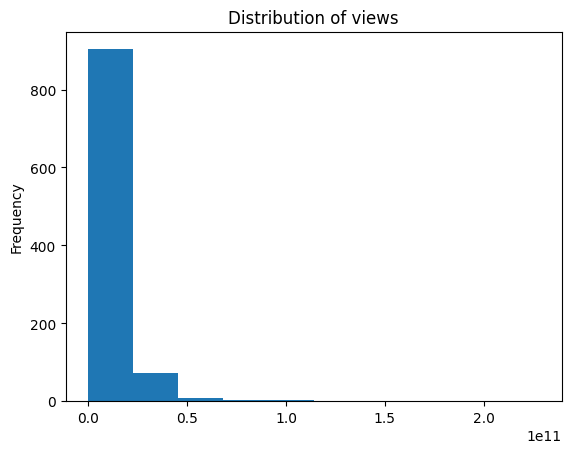

In [9]:
#8. Побудуйте діаграму розподілу переглядів (використовуйте kind='hist'):
df["video views"].plot(kind="hist", title="Distribution of views") 

In [10]:
#9. Визначте максимальну, мінімальну, середню кількість переглядів (використовуйте методи max, min, mean)
max = df["video views"].max()
min = df["video views"].min()
mean = df["video views"].mean()
print(f"The maximal number of views: {max}\nThe minimal: {min}\nAnd the mean number: {mean}")

The maximal number of views: 228000000000.0
The minimal: 0.0
And the mean number: 11039537052.03819


In [11]:
#10.Знайдіть країну, де найбільше відео було завантажено на YouTube
country = df["Country"].value_counts().idxmax()
print(f"In {country} was uploaded the biggest amount of videos")

In United States was uploaded the biggest amount of videos


In [12]:
#11. Знайдіть відео (виведіть його назву) з найбільшою та найменшою кількістю завантажень uploads.

title_max = df.loc[df["uploads"].idxmax()]["Title"] 
title_min = df.loc[df["uploads"].idxmin()]["Title"]

print(f"Channel with the biggest upload amount: {title_max}\nChannel with the smallest upload amount: {title_min}")

Channel with the biggest upload amount: ABP NEWS
Channel with the smallest upload amount: Music
